In [1]:
import sys
sys.path.append('')

import os
from os.path import splitext, isfile, join

import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
from dataset import allen_dataset

In [3]:
dataset = allen_dataset()

In [4]:
from torch.utils.data import Dataset, DataLoader

In [5]:
dataloader = DataLoader(dataset, batch_size=16)

In [9]:
for data in dataloader:
    print(data['img'].shape)
    break

torch.Size([16, 1, 918, 1174])


### Sort targets from each experiment into the same order and neural accordingly

In [2]:
path = '../data/ALLEN/natural_scenes'

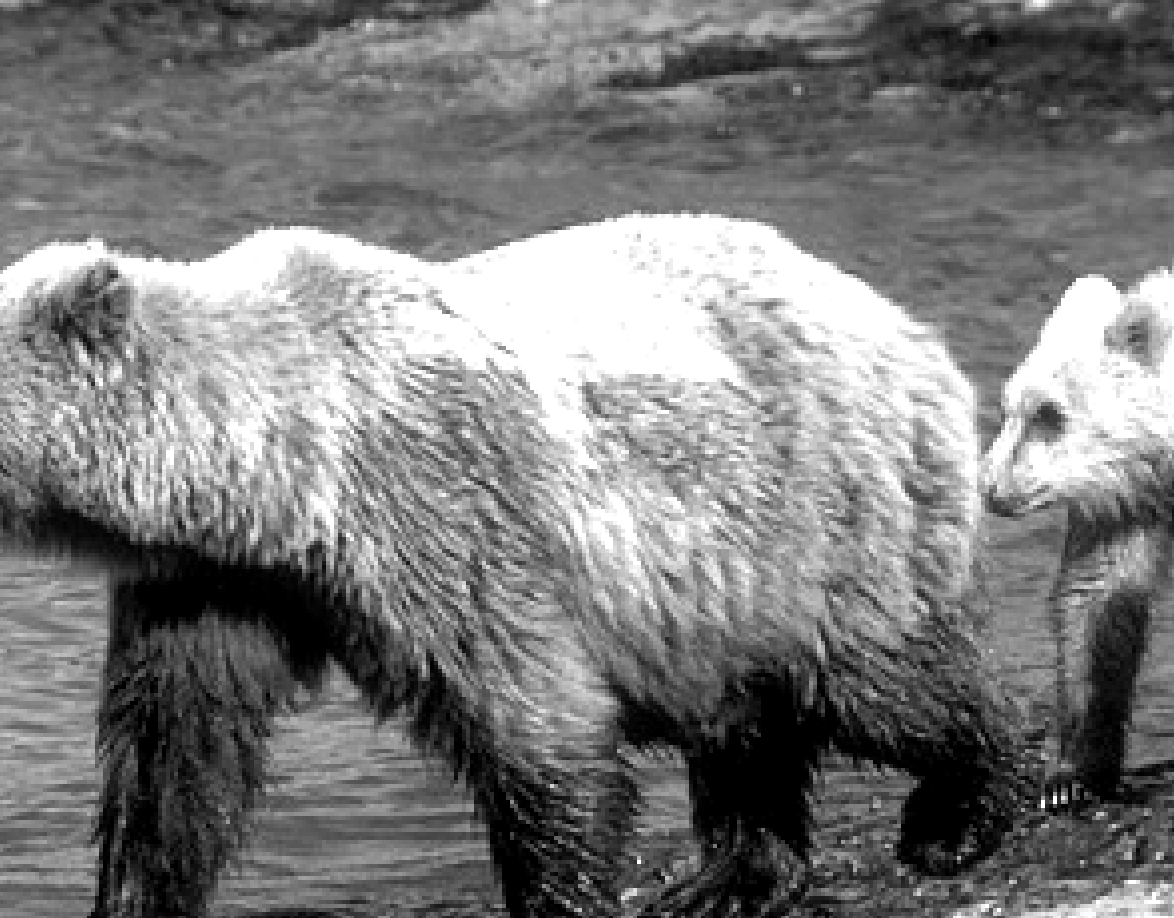

In [8]:
Image.open(os.path.join(path, 'templates/natural_scene_0.tiff'))

In [12]:
torch.unsqueeze(torch.tensor(np.array(Image.open(os.path.join(path, 'templates/natural_scene_0.tiff'))), dtype=torch.float32), dim=0).shape

torch.Size([1, 918, 1174])

In [17]:
sorted(os.listdir(os.path.join(path, 'neural_per_exp')))

['LGd_natural_scenes_neural_trial_0.npy',
 'LGd_natural_scenes_neural_trial_1.npy',
 'LGd_natural_scenes_neural_trial_10.npy',
 'LGd_natural_scenes_neural_trial_100.npy',
 'LGd_natural_scenes_neural_trial_1000.npy',
 'LGd_natural_scenes_neural_trial_1001.npy',
 'LGd_natural_scenes_neural_trial_1002.npy',
 'LGd_natural_scenes_neural_trial_1003.npy',
 'LGd_natural_scenes_neural_trial_1004.npy',
 'LGd_natural_scenes_neural_trial_1005.npy',
 'LGd_natural_scenes_neural_trial_1006.npy',
 'LGd_natural_scenes_neural_trial_1007.npy',
 'LGd_natural_scenes_neural_trial_1008.npy',
 'LGd_natural_scenes_neural_trial_1009.npy',
 'LGd_natural_scenes_neural_trial_101.npy',
 'LGd_natural_scenes_neural_trial_1010.npy',
 'LGd_natural_scenes_neural_trial_1011.npy',
 'LGd_natural_scenes_neural_trial_1012.npy',
 'LGd_natural_scenes_neural_trial_1013.npy',
 'LGd_natural_scenes_neural_trial_1014.npy',
 'LGd_natural_scenes_neural_trial_1015.npy',
 'LGd_natural_scenes_neural_trial_1016.npy',
 'LGd_natural_scenes

In [4]:
target_files = sorted(os.listdir(join(path, 'target')))
neural_files = sorted(os.listdir(join(path, 'neural')))

total_n_neurons = 0
neural_arr_list = []
for i, target_file in enumerate(target_files):
    if splitext(target_file)[0].split('_')[0] == 'LGd':
        target_arr = np.load(join(path, join('target', target_file)))
        neural_file = neural_files[i]
        neural_arr = np.load(join(path, join('neural', neural_file)))
        total_n_neurons += neural_arr.shape[1] # neuron dim

        sorted_idx = np.argsort(target_arr)
        print(neural_file, neural_arr.shape)
        if len(sorted_idx) == 119 * 50: # 119 targets, each repeats for 50 times
            target_arr_sorted = target_arr[sorted_idx][50:] # Get rid of target -1 
            neural_arr_sorted = neural_arr[sorted_idx][50:] # Get rid of target -1
            neural_arr_list.append(neural_arr_sorted)

LGd_natural_scenes_neural_715093703.npy (5950, 82, 250)
LGd_natural_scenes_neural_719161530.npy (5950, 71, 250)
LGd_natural_scenes_neural_743475441.npy (5950, 42, 250)
LGd_natural_scenes_neural_744228101.npy (5947, 1, 250)
LGd_natural_scenes_neural_746083955.npy (5950, 34, 250)
LGd_natural_scenes_neural_750332458.npy (5950, 4, 250)
LGd_natural_scenes_neural_750749662.npy (5950, 82, 250)
LGd_natural_scenes_neural_751348571.npy (5950, 55, 250)
LGd_natural_scenes_neural_754312389.npy (5950, 27, 250)
LGd_natural_scenes_neural_754829445.npy (5950, 90, 250)
LGd_natural_scenes_neural_755434585.npy (5950, 44, 250)
LGd_natural_scenes_neural_756029989.npy (5950, 60, 250)
LGd_natural_scenes_neural_757216464.npy (5939, 6, 250)
LGd_natural_scenes_neural_757970808.npy (5950, 45, 250)
LGd_natural_scenes_neural_759883607.npy (5950, 23, 250)
LGd_natural_scenes_neural_760345702.npy (5950, 37, 250)
LGd_natural_scenes_neural_761418226.npy (5950, 41, 250)
LGd_natural_scenes_neural_763673393.npy (5950, 77, 

In [5]:
total_n_neurons

899

In [6]:
filename = 'LGd_natural_scenes_neural.npy'
n_trials, n_neurons, n_timestamps = neural_arr_sorted.shape[0], total_n_neurons, neural_arr_sorted.shape[2]  # Example shape

# Create an empty memory-mapped file
total_neural_arr = np.memmap(join(path, filename), dtype='float64', mode='w+', shape=(n_trials, n_neurons, n_timestamps))

curr_total_n_neurons = 0
# Write data incrementally
for neural_arr in neural_arr_list:  # Writing in chunks
    curr_n_neurons = neural_arr.shape[1]
    total_neural_arr[:, curr_total_n_neurons:curr_total_n_neurons+curr_n_neurons, :] = neural_arr

    curr_total_n_neurons += curr_n_neurons

# Ensure changes are written to the file
total_neural_arr.flush()

In [9]:
import numpy as np

# Open the memory-mapped file
filename = 'LGd_natural_scenes_neural.npy'
data = np.memmap(join(path, filename), dtype='float64', mode='r', shape=(n_trials, n_neurons, n_timestamps))

# # Determine the number of rows and columns
# n_trials, n_neurons, n_timestamps  = data.shape

In [10]:
data.shape

(5900, 899, 250)

In [17]:
from tqdm.notebook import tqdm

In [19]:
for i in tqdm(range(len(data))):
    np.save(join(path, f'neural_per_exp/LGd_natural_scenes_neural_trial_{i}.npy'), data[i])

  0%|          | 0/5900 [00:00<?, ?it/s]